In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        
        # Convolution Layer
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        
        # Fully Connected Layer
        self.fc1 = nn.Linear(16 * 5* 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
    
    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2,2))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features
        

In [3]:
net = LeNet()
print(net)

LeNet(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [4]:
input = torch.rand(1, 1, 32, 32)
print(f'Image Batch shape: {input.shape}')

Image Batch shape: torch.Size([1, 1, 32, 32])


In [5]:
output = net(input)
print(f'Raw Output: {output.shape}')

Raw Output: torch.Size([1, 10])


In [8]:
#%matplotlib

import torch
import torchvision
import torchvision.transforms as transforms

In [10]:
transform = transforms.Compose(
[
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2470, 0.2435, 0.2616))
])

In [11]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)

100%|██████████████████████████████████████████████████████████████| 170498071/170498071 [00:09<00:00, 18434511.74it/s]


Extracting ./data\cifar-10-python.tar.gz to ./data


In [12]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True,  num_workers=2)

In [13]:
import matplotlib.pyplot as plt
import numpy as np

In [14]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [15]:
def imshow(img):
    img = img/2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))

In [16]:
dataiter = iter(trainloader)
images, labels = next(dataiter)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 deer plane horse   car


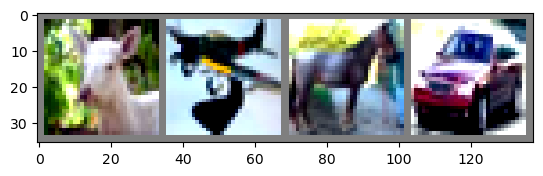

In [17]:
imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))